In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import json

from shapely.geometry import Polygon
from pathlib import Path

sys.path.append(str(Path.cwd()))

from plotting_constants import coarse_regions
from plotting_constants import colors as mode_colors
from data_utils import (
    prepare_egs_data,
    prepare_data_for_plot,
    get_capacity_data,
    adjust_lightness,
)

idx = pd.IndexSlice

In [2]:
regions = gpd.read_file(
    Path.cwd().parent.parent.parent /
    "cluster_data" /
    "old_data" /
    "resources" /
    "regions_onshore_elec_s_72.geojson"
    ).set_crs("EPSG:4326").set_index("name")

root = str(Path.cwd().parent.parent.parent / "cluster_data" / "{}_data")

In [3]:
prepared_data = prepare_egs_data(Path.cwd().parent / "data" / "egs_costs.json")

<AxesSubplot:>

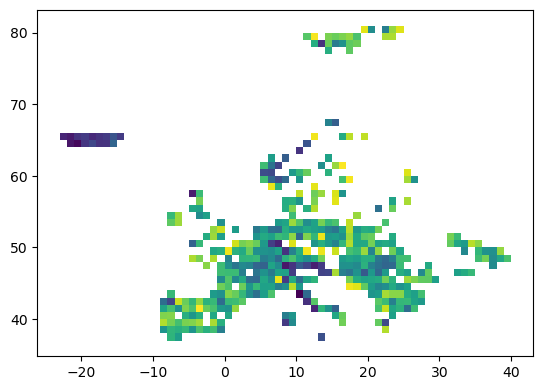

In [4]:
prepared_data[2050].plot(column="CAPEX")

In [5]:
op = "static"

# region_name = "Southern-Central Germany"
region_name = "all"

years = [2020, 2025, 2030, 2035, 2040, 2045, 2050]

c1 = (0/255,139/255,251/255)
c2 = (255/255,0/255,81/255)

colors = [c1, c2]

cm = [plt.cm.colors.to_hex(c) for c in np.linspace(c1, c2, len(years))]

results_chp = get_capacity_data("chp", op)

Southern-Central Germany


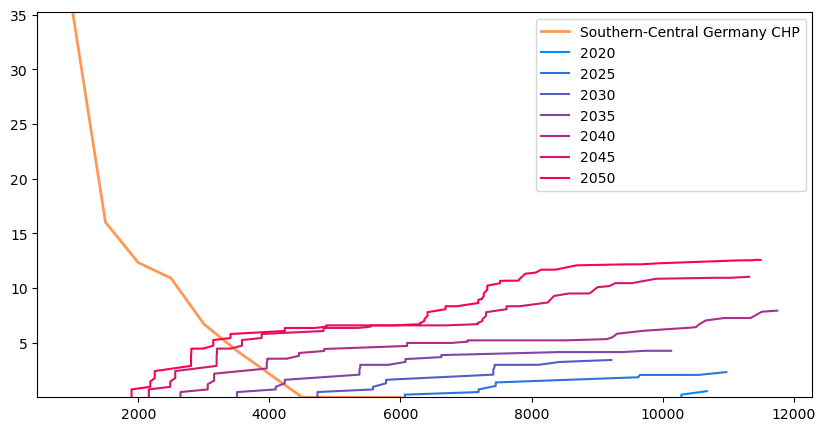

Northern Germany


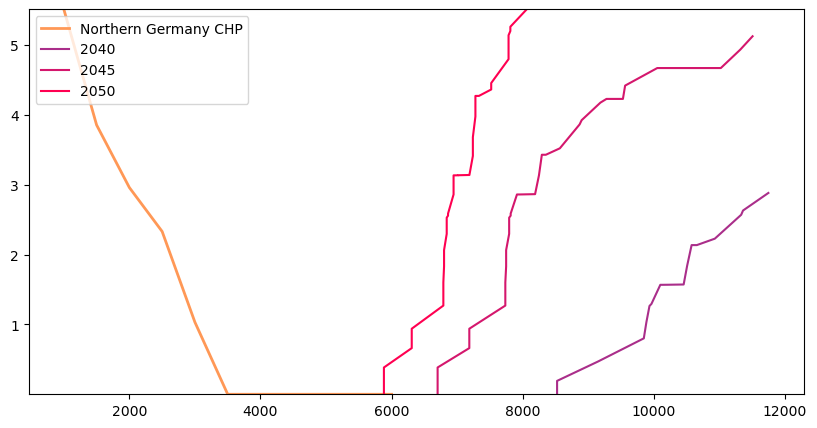

Northern Italy, Slovenia


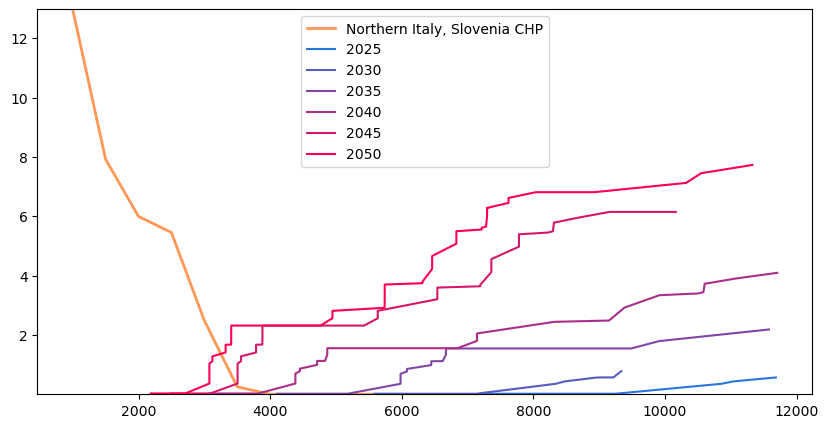

Southern Italy


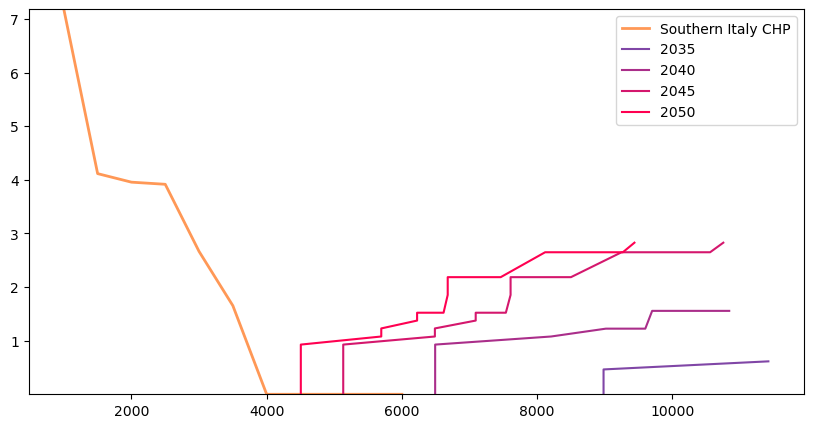

Western Poland


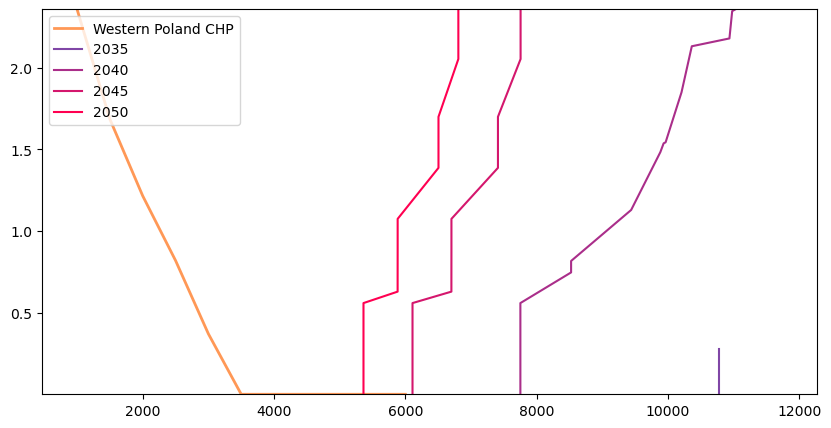

Eastern Poland


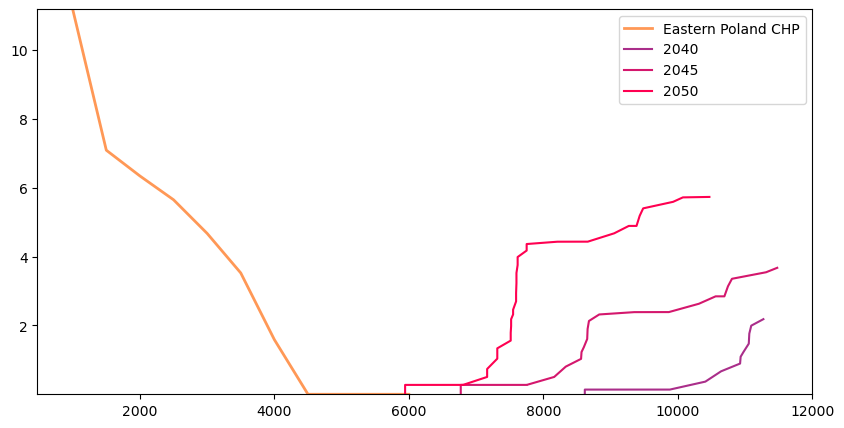

Scandinavia (w/o DK)


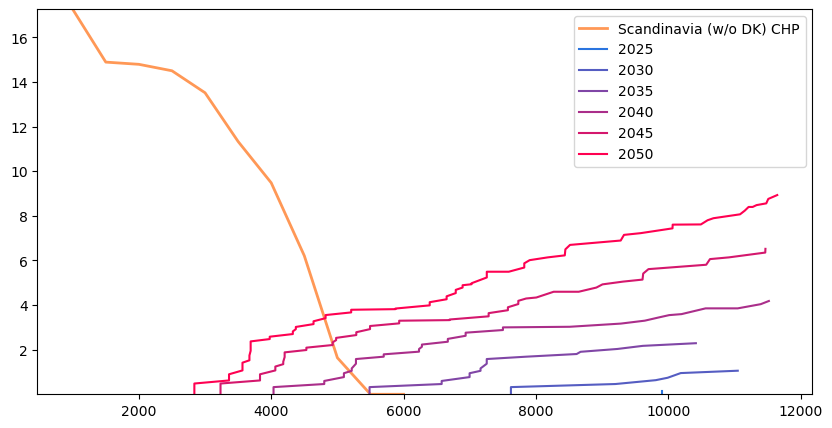

Denmark


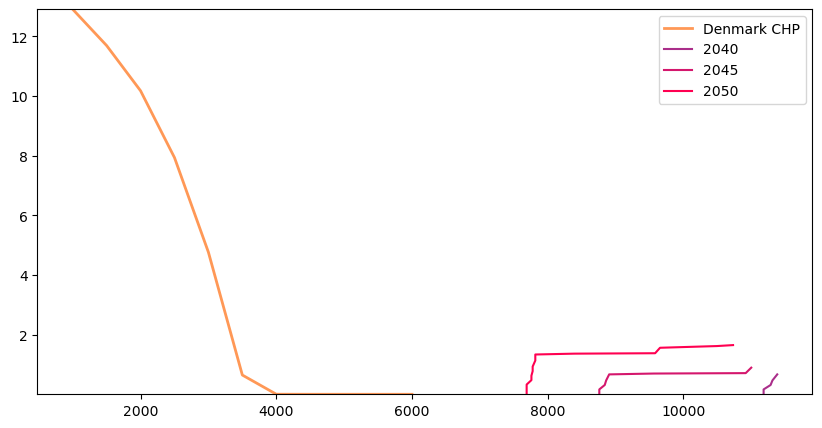

Ireland


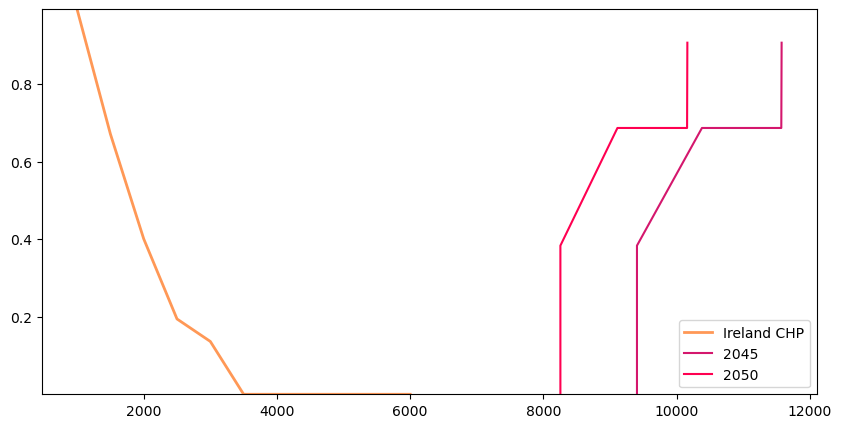

Baltic States


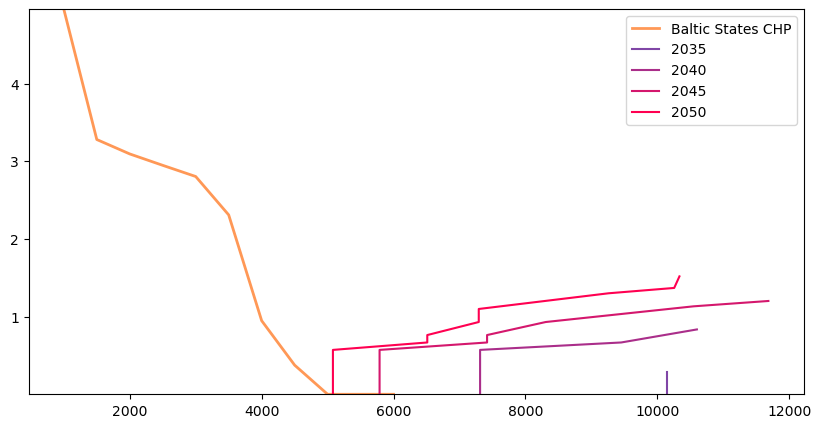

Great Britain


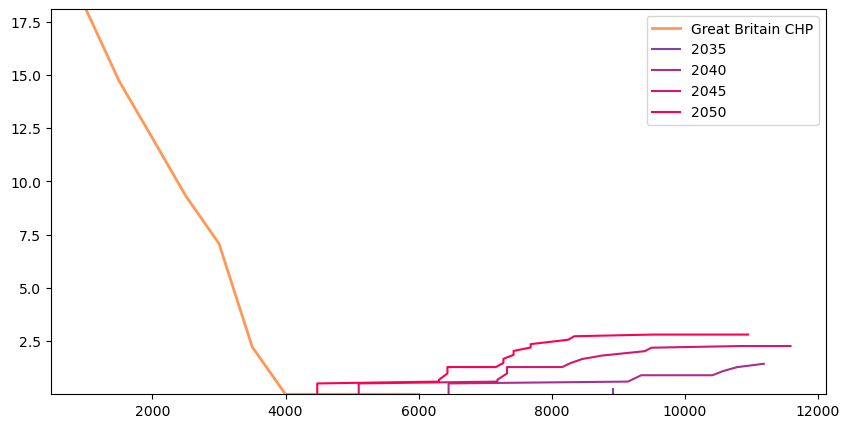

Northern France


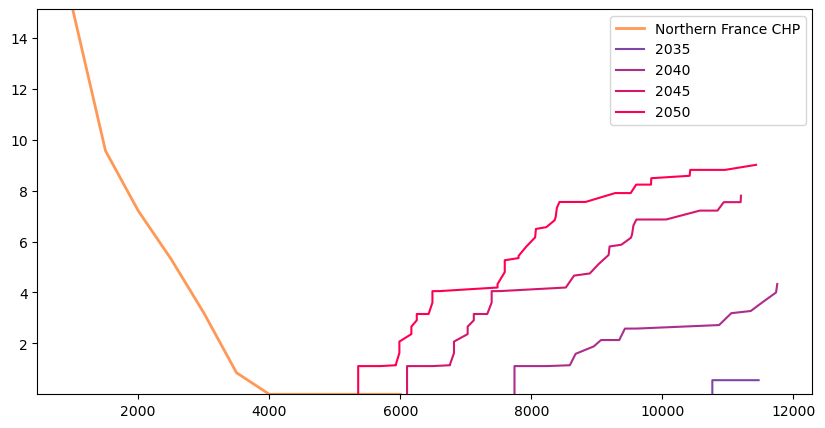

Southern France


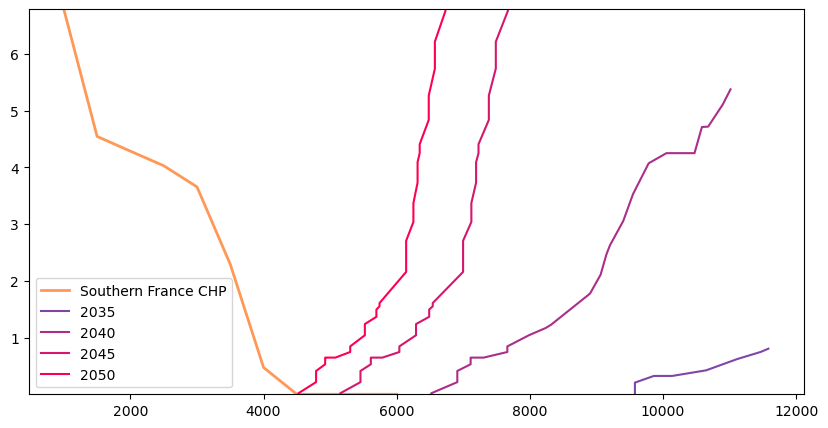

Eastern France


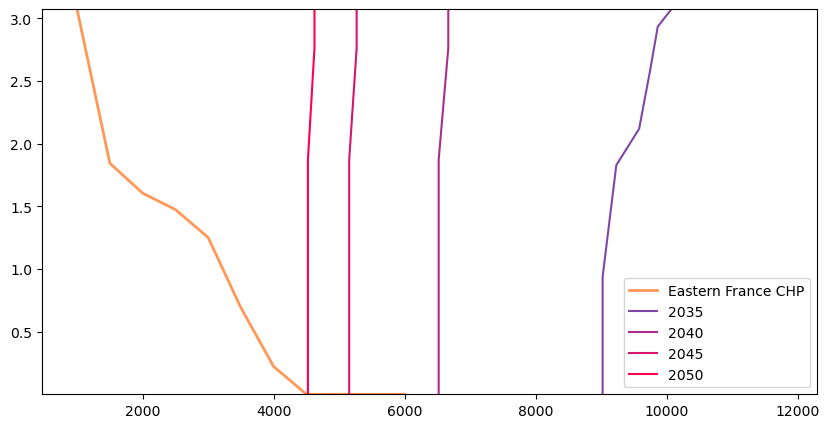

Benelux


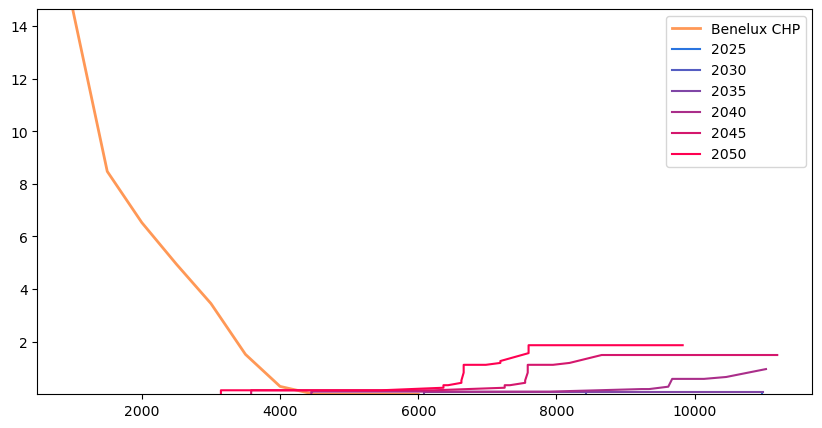

Iberia


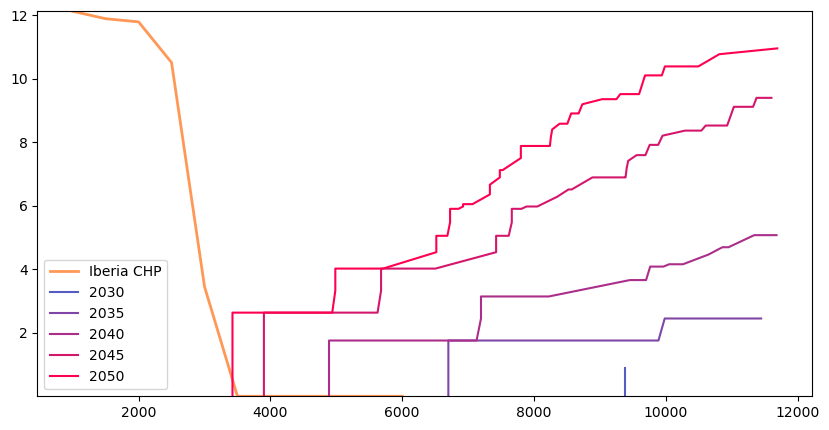

Austria


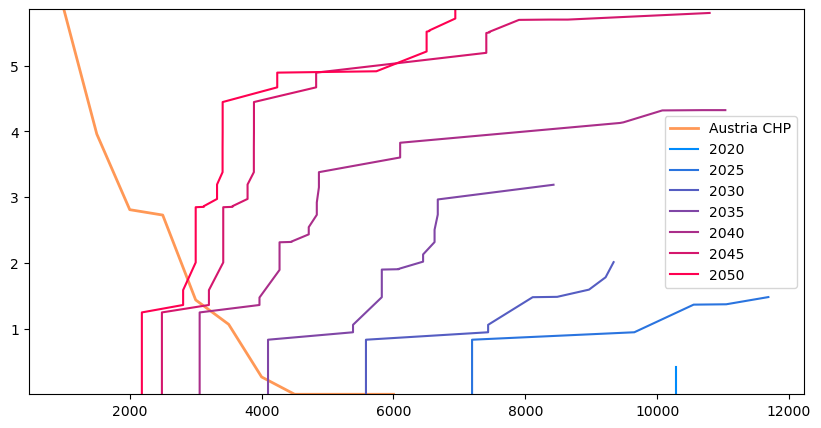

Switzerland


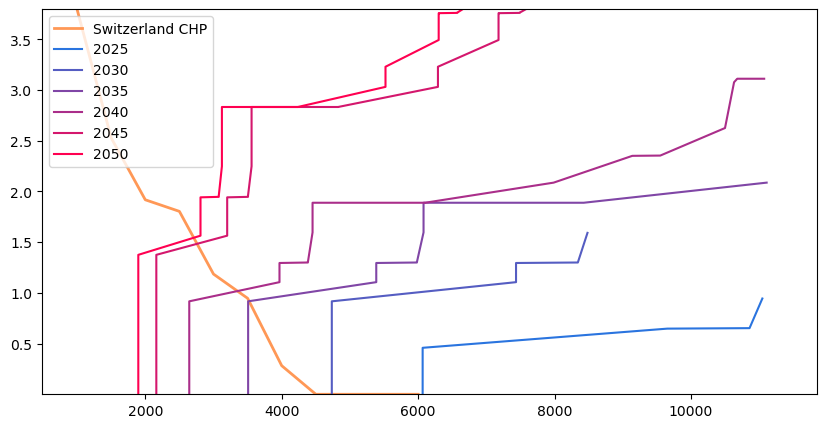

Czech Republic, Slovakia


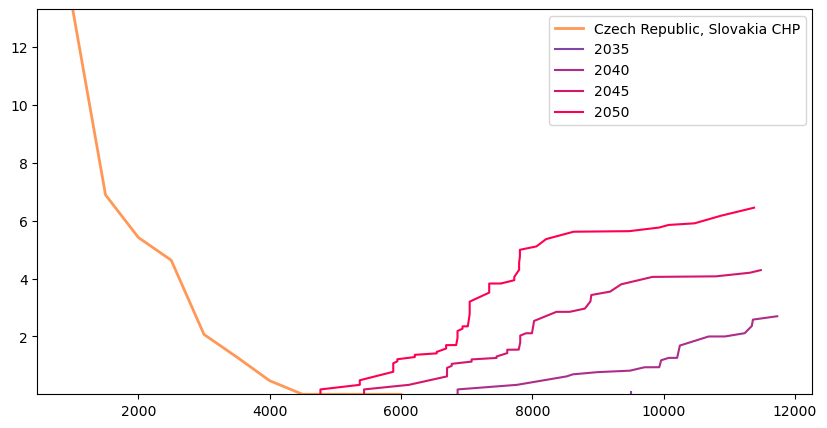

Romania, Bulgaria, Serbia, Hungary


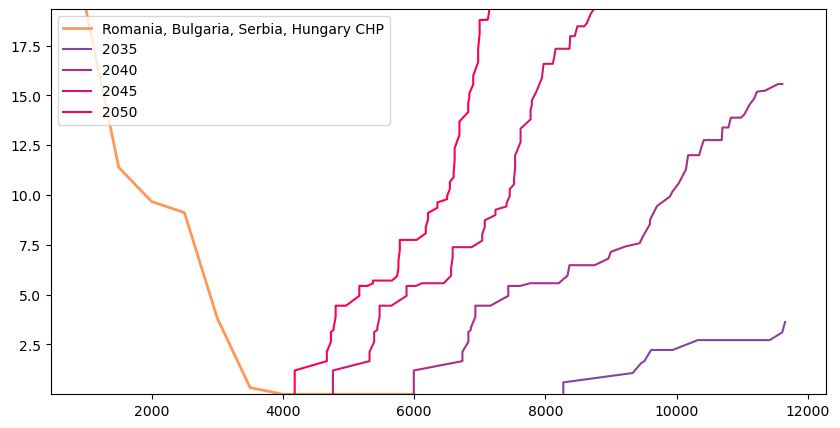

Bosnia, Montenegro, Albania, Croatia


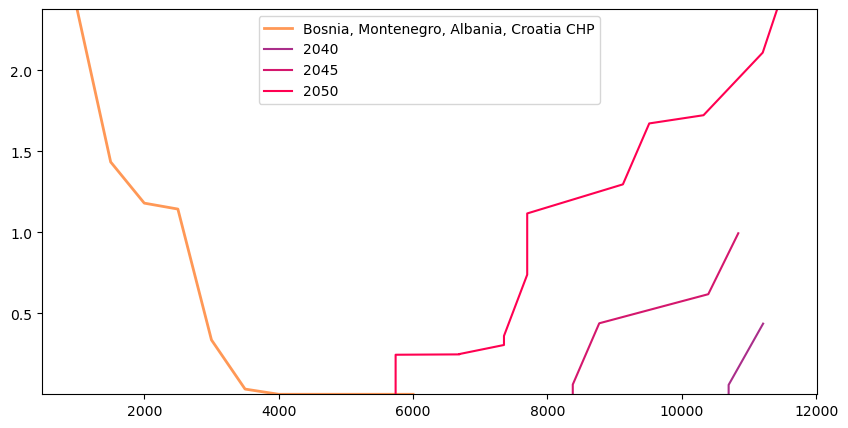

Mazedonia, Greece


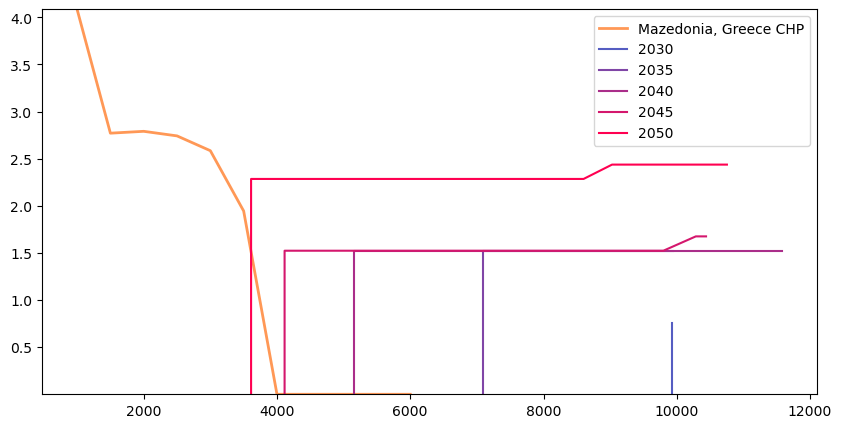

In [6]:
for region_name in coarse_regions.keys():
    print(region_name)
        
    fig, ax = plt.subplots(figsize=(10, 5))

    if region_name == "all":
        plot_data = results.sum()
    else:
        plot_data = results.loc[coarse_regions[region_name]].sum()

    line_kwargs = {
        "linewidth": 2,
        }

    ax.plot(
        plot_data.index.astype(int),
        plot_data.values,
        label={"all": "Europe"}.get(region_name, region_name) + " " + mode.upper(),
        color=adjust_lightness(mode_colors[mode], 0.8),
        **line_kwargs,
        )

    for i, year in enumerate(years):
        year_data = prepare_data_for_plot(
            prepared_data,
            region_name,
            year,
            sustainability_factor=1.)[["CAPEX", "HeatPower_cumsum"]]
        year_data = year_data.loc[year_data["HeatPower_cumsum"] > 0.01]

        if year_data.empty:
            continue

        year_data = pd.concat((pd.DataFrame({
                "CAPEX": [year_data["CAPEX"].iloc[0]],
                "HeatPower_cumsum": [0]
            }), year_data))

        ax.plot(year_data["CAPEX"], year_data["HeatPower_cumsum"], label=year, color=cm[i])

    ax.set_ylim(plot_data.values.min(), plot_data.values.max())
    ax.legend()
    plt.show()